11490434/11490434 [==============================] - 2s 0us/step

 train shape = (60000, 28, 28) , train label shape = (60000,)
test shape = (10000, 28, 28) , test label shape = (10000,)

 train label = [5 0 4 ... 5 6 8]
test label = [7 2 1 ... 4 5 6]


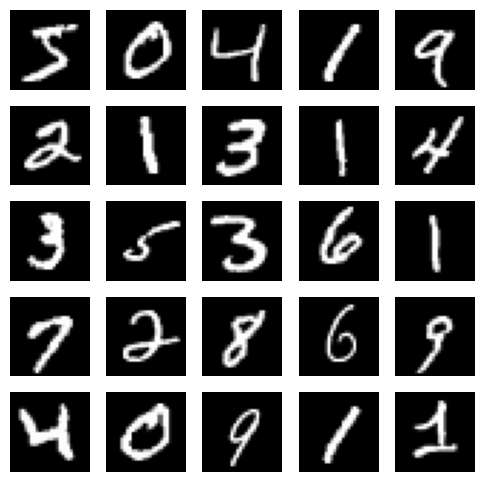

In [3]:
# 데이터 불러오기 및 확인
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('\n train shape =', x_train.shape,
      ', train label shape =', t_train.shape)
print('test shape =', x_test.shape,
      ', test label shape =', t_test.shape)

print('\n train label =', t_train) # 학습데이터 정답 출력
print('test label =', t_test) # 테스트 데이터 정답 출력

import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6,6))

for index in range(25): # 25개의 이미지 출력
  plt.subplot(5, 5, index + 1) # 5행 5열
  plt.imshow(x_train[index], cmap='gray')
  plt.axis('off')
  # plt.title(str(t_train[index]))

plt.show()

In [4]:
# 데이터 전처리 (정규화, 원핫 인코딩)
x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답 데이터 원핫 인코딩 (One-Hot Encoding)
# MNIST 정답 데이터는 0~9까지 총 10개의 숫자 가운데 하나이므로,
# num_classes=10 지정하여 10개의 리스트를 만들어서 원핫 인코딩 수행
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [5]:
# 모델 구축
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [6]:
# 모델 컴파일
# 정답을 원핫 인코딩 방시긍로 나타냈기 때문에 loss를 categorical_crossentropy로 설정
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 모델 학습
# training data로 부터 30% 비율로 validation data 생성 후 overfitting 확인
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 11s 5ms/step - loss: 0.3106 - accuracy: 0.9112 - val_loss: 0.1903 - val_accuracy: 0.9451
Epoch 2/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1461 - accuracy: 0.9563 - val_loss: 0.1406 - val_accuracy: 0.9598
Epoch 3/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1023 - accuracy: 0.9695 - val_loss: 0.1345 - val_accuracy: 0.9599
Epoch 4/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0784 - accuracy: 0.9763 - val_loss: 0.1171 - val_accuracy: 0.9664
Epoch 5/30
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0616 - accuracy: 0.9815 - val_loss: 0.1134 - val_accuracy: 0.9672
Epoch 6/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0503 - accuracy: 0.9851 - val_loss: 0.1128 - val_accuracy: 0.9674
Epoch 7/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0390 - accuracy: 0.9885 - val_loss: 0.1048 - val_accuracy

In [8]:
# 모델 (정확도) 평가
model.evaluate(x_test, t_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1417 - accuracy: 0.9757


[0.14172525703907013, 0.9757000207901001]

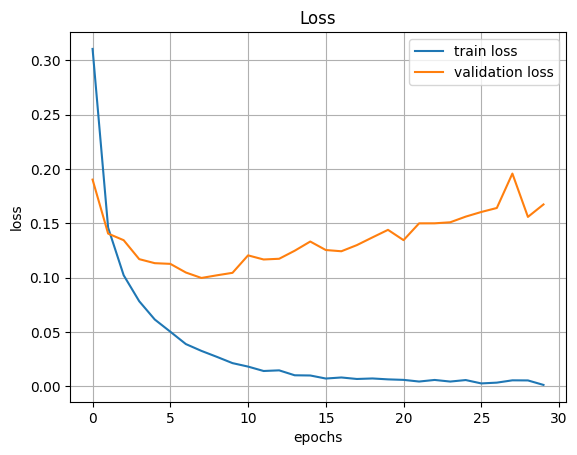

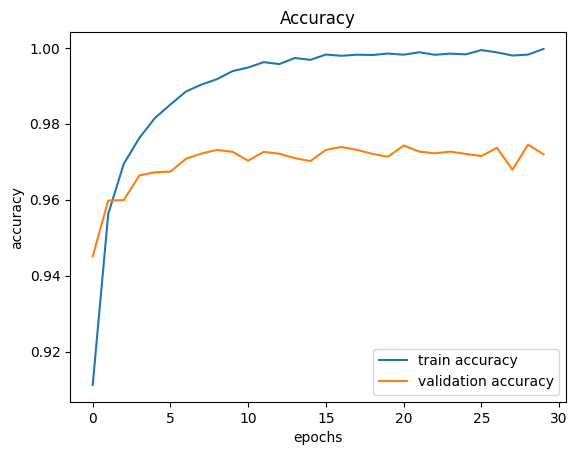

In [9]:
# 손실 및 정확도
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

313/313 [==============================] - 1s 3ms/step


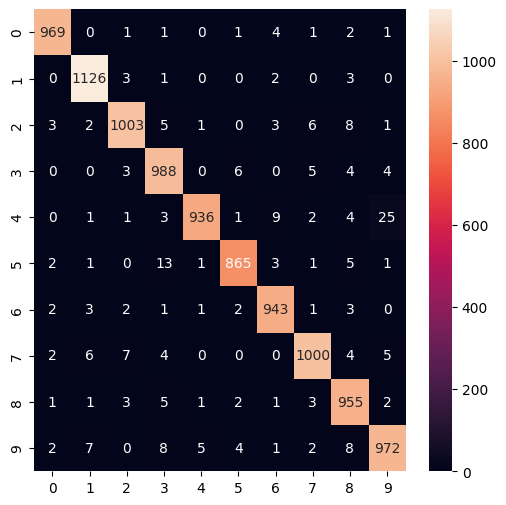

[[ 969    0    1    1    0    1    4    1    2    1]
 [   0 1126    3    1    0    0    2    0    3    0]
 [   3    2 1003    5    1    0    3    6    8    1]
 [   0    0    3  988    0    6    0    5    4    4]
 [   0    1    1    3  936    1    9    2    4   25]
 [   2    1    0   13    1  865    3    1    5    1]
 [   2    3    2    1    1    2  943    1    3    0]
 [   2    6    7    4    0    0    0 1000    4    5]
 [   1    1    3    5    1    2    1    3  955    2]
 [   2    7    0    8    5    4    1    2    8  972]]


label = 0	(969/980)	accuracy = 0.989
label = 1	(1126/1135)	accuracy = 0.992
label = 2	(1003/1032)	accuracy = 0.972
label = 3	(988/1010)	accuracy = 0.978
label = 4	(936/982)	accuracy = 0.953
label = 5	(865/892)	accuracy = 0.970
label = 6	(943/958)	accuracy = 0.984
label = 7	(1000/1028)	accuracy = 0.973
label = 8	(955/974)	accuracy = 0.980
label = 9	(972/1009)	accuracy = 0.963


In [13]:
# 혼동 행렬 (confusion matrix)
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))
predicted_value = model.predict(x_test)

cm = confusion_matrix(np.argmax(t_test, axis=-1),
                      np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

print(cm)
print('\n')

for i in range(10):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f') %
          (i, np.max(cm[i]), np.sum(cm[i]),
           np.max(cm[i])/np.sum(cm[i])))